In [1]:
####AKSHAY J
#####21105012
###DEEP LEARNING ASSIGNMENT 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import os
import cv2
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report

In [2]:
####SETTING THE IMAGE SIZE AND FOLDER DIRECTORY
train_dir='train/'      ####Folder Directory
img_size=50  

<font color='red'>
 It can be seen that by increasing the image size higher accuracy can be obtained. But increasing the image size leads to a demand for increase in amount of storage required as well as computational power required.
</font>

In [3]:
####FUNCTION FOR LABELLING AND SETTING THE DATA
def dataset(dir):
    photos=[]
    labels=[]
    count=0
    #####DOGS ARE SET TO HAVE A LABEL=0 AND CATS ARE SET TO HAVE A LABEL=1
    for images in os.listdir(dir):
        if images.startswith('dog'):
            label=1
        elif images.startswith('cat'):
            label=0
        img = cv2.imread(os.path.join(dir,images))
        image=cv2.resize(img,(img_size,img_size))
        if img is not None:
            photos.append(image)
        labels.append(label)
        count=count+1
    return photos,labels,count

In [4]:
#######SETTING THE DATA
X,Y,train_count=dataset(train_dir)
X=np.asarray(X)
Y=np.asarray(Y)
X=np.mean(X,-1)
X=X.reshape(train_count,img_size*img_size)

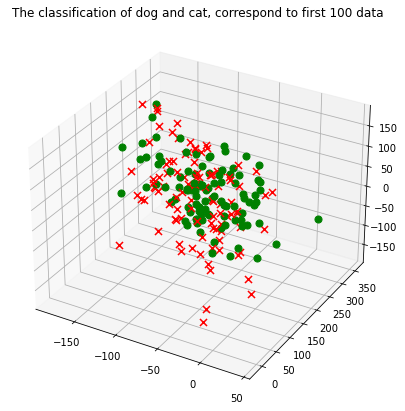

In [5]:
####Checking the seperation of dogs and cats data using SVD
U,S,VT=np.linalg.svd(X,full_matrices=False)
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111,projection='3d')
for j in range(0,25000):  
    M=VT[:,0] @ X[j,:].T
    N=VT[:,1] @ X[j,:].T
    O=VT[:,2] @ X[j,:].T
    if j>=0 and j<100:
           ax.scatter(M,N,O,marker='x',color='r',label='cats',s=50)
    if j>=12500 and j<12600:
           ax.scatter(M,N,O,marker='o',color='g',label='dogs',s=50)
plt.title('The classification of dog and cat, correspond to first 100 data')
plt.show()

<font color='red'>
From the plot it is clearly visible that the classification between the images of dog and cat is mixed up. Due to this fact the amount of accuracy that can be obtained with ordinary classifiers such as KNNclassifier, LogisticRegression and SVC is less as compared to the Convolution Neural Network.
</font>

In [6]:
####Using MinMaxScaler array values are scaled down
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)


#####Splitiing the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

D:\Peripherals\Miniconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x360 with 0 Axes>

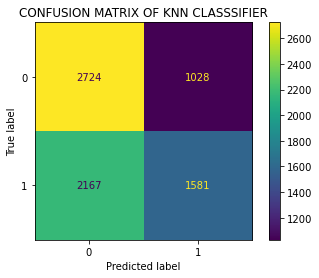

              precision    recall  f1-score   support

        Dogs       0.56      0.73      0.63      3752
        Cats       0.61      0.42      0.50      3748

    accuracy                           0.57      7500
   macro avg       0.58      0.57      0.56      7500
weighted avg       0.58      0.57      0.56      7500



In [7]:
###KNN_CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(X_train,Y_train)
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(10,5))
sklearn.metrics.plot_confusion_matrix(knnclassifier,X_test,Y_test)
plt.title('CONFUSION MATRIX OF KNN CLASSSIFIER')
plt.show()
####Classification Report
y_pred=knnclassifier.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['Dogs','Cats']))

D:\Peripherals\Miniconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Peripherals\Miniconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


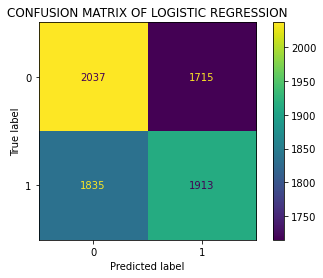

              precision    recall  f1-score   support

        Dogs       0.53      0.54      0.53      3752
        Cats       0.53      0.51      0.52      3748

    accuracy                           0.53      7500
   macro avg       0.53      0.53      0.53      7500
weighted avg       0.53      0.53      0.53      7500



In [8]:
###LOGISTIC_REGRESSION
from sklearn.linear_model import LogisticRegression
LRclass=LogisticRegression()
LRclass.fit(X_train,Y_train)
sklearn.metrics.plot_confusion_matrix(LRclass,X_test,Y_test)
plt.title('CONFUSION MATRIX OF LOGISTIC REGRESSION')
plt.show()
####Classification Report
y_pred=LRclass.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['Dogs','Cats']))

D:\Peripherals\Miniconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


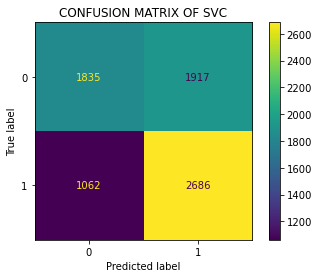

              precision    recall  f1-score   support

        Dogs       0.63      0.49      0.55      3752
        Cats       0.58      0.72      0.64      3748

    accuracy                           0.60      7500
   macro avg       0.61      0.60      0.60      7500
weighted avg       0.61      0.60      0.60      7500



In [9]:
####SVC
from sklearn.svm import SVC
svcclass=SVC(gamma='auto',C=0.45)
svcclass.fit(X_train,Y_train)
sklearn.metrics.plot_confusion_matrix(svcclass,X_test,Y_test)
plt.title('CONFUSION MATRIX OF SVC')
plt.show()
####Classification Report
y_pred=svcclass.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['Dogs','Cats']))

<font color='red'>
Out of the three classifiers SVC shows higher accuracy. Since SVC classifier tries to minimise number of misclassifciation as well as try to increase the margin better accuarcy is obtained all around.
</font>

In [ ]:
###RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,Y_train)
sklearn.metrics.plot_confusion_matrix(RFC,X_test,Y_test)
plt.title('CONFUSION MATRIX OF RANDOM FOREST CLASSIFIER')
plt.show()
####Classification Report
y_pred=RFC.predict(X_test)
print(classification_report(Y_test,y_pred,target_names=['Dogs','Cats']))